# Classical Time Series Forecasting Methods in Python

Machine learning methods can be used for classification and forecasting on time series problems.

Before exploring machine learning methods for time series, it is a good idea to ensure you have exhausted classical linear time series forecasting methods. Classical time series forecasting methods may be focused on linear relationships, nevertheless, they are sophisticated and perform well on a wide range of problems, assuming that your data is suitably prepared and the method is well configured.

## Overview
This notebook demonstrates 11 different classical time series forecasting methods; they are:

    1. Autoregression (AR)
    2. Moving Average (MA)
    3. Autoregressive Moving Average (ARMA)
    4. Autoregressive Integrated Moving Average (ARIMA)
    5. Seasonal Autoregressive Integrated Moving-Average (SARIMA)
    6. Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
    7. Vector Autoregression (VAR)
    8. Vector Autoregression Moving-Average (VARMA)
    9. Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
    10. Simple Exponential Smoothing (SES)
    11. Holt Winter’s Exponential Smoothing (HWES)

Each code example is demonstrated on a simple contrived dataset that may or may not be appropriate for the method. Replace the contrived dataset with your data in order to test the method.

Each method will require tuning to your specific problem. In many cases, I have examples of how to configure and even grid search parameters on the blog already, try the search function.

# Code Example & Description

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter('ignore')

# Common code for display result
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()

## 1. Autoregression (AR)
The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.<br>

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.<br>

The method is suitable for univariate time series without trend and seasonal components.<br>

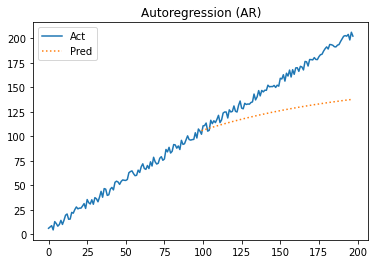

In [2]:
from statsmodels.tsa.ar_model import AutoReg
from random import random

def AR_model(train,test):
    # fit model
    model = AutoReg(train['Act'], lags=1)
    model_fit = model.fit()
    # make prediction
    yhat=model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(1, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 200)],
                     columns=['Act'])
df_ret = AR_model(df_train, df_test)
show_graph(df_train, df_ret, "Autoregression (AR)")

## 2. Moving Average (MA)
The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.<br>

A moving average model is different from calculating the moving average of the time series.<br>

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.<br>

The method is suitable for univariate time series without trend and seasonal components.<br>

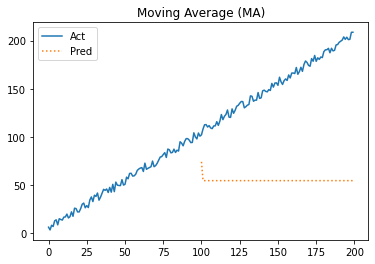

In [3]:
from statsmodels.tsa.arima_model import ARMA
from random import random

def MA_model(train,test):
    # fit model
    model = ARMA(train['Act'], order=(0, 1))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)],
                     columns=['Act'])
df_ret = MA_model(df_train, df_test)
show_graph(df_train, df_ret, "Moving Average (MA)")

## 3. Autoregressive Moving Average (ARMA)
The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and resiudal errors at prior time steps.<br>

It combines both Autoregression (AR) and Moving Average (MA) models.<br>

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.<br>

The method is suitable for univariate time series without trend and seasonal components.<br>

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


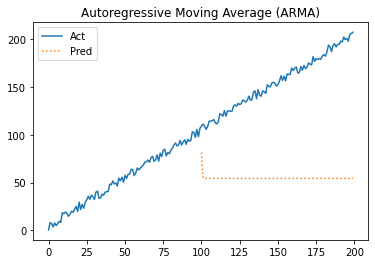

In [4]:
from statsmodels.tsa.arima_model import ARMA
from random import random

def ARMA_model(train,test):
    # fit model
    model = ARMA(train['Act'], order=(1,2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)],
                     columns=['Act'])
df_ret = ARMA_model(df_train, df_test)
show_graph(df_train, df_ret, "Autoregressive Moving Average (ARMA)")

## 4. Autoregressive Integrated Moving Average (ARIMA)
The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.<br>

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).<br>

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.<br>

The method is suitable for univariate time series with trend and without seasonal components.<br>

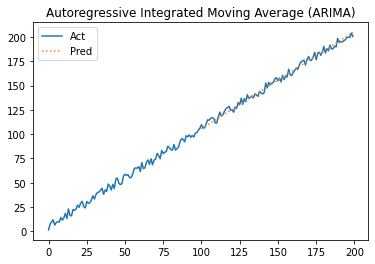

In [5]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

def ARIMA_model(train,test):
    # fit model
    model = ARIMA(train['Act'], order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1, typ='levels')
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)],
                     columns=['Act'])
df_ret = ARIMA_model(df_train, df_test)
show_graph(df_train, df_ret, "Autoregressive Integrated Moving Average (ARIMA)")

## 5. Seasonal Autoregressive Integrated Moving-Average (SARIMA)
The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.<br>

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.<br>

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.<br>

The method is suitable for univariate time series with trend and/or seasonal components.<br>

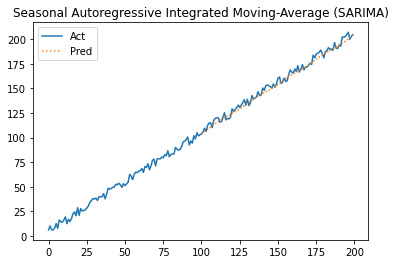

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

def SARIMA_model(train,test):
    # fit model
    model = SARIMAX(train['Act'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)],
                     columns=['Act'])
df_ret = SARIMA_model(df_train, df_test)
show_graph(df_train, df_ret, "Seasonal Autoregressive Integrated Moving-Average (SARIMA)")

## 6. Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.<br>

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).<br>

The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX.<br>

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.<br>

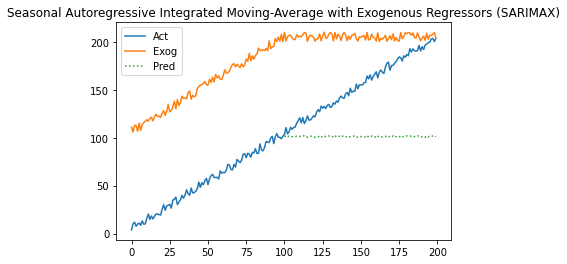

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

def SARIMAX_model(train,test):
    # fit model
    model = SARIMAX(train.drop('Exog', axis=1), exog=train['Exog'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1, exog=test["Exog"].values)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values,"Exog":test["Exog"].values})
    return res

df_train = pd.DataFrame({'Act':[x + random()*10 for x in range(0, 100)],
                         'Exog':[x + random()*10 for x in range(101, 201)]})
df_test = pd.DataFrame({'Act':[x + random()*10 for x in range(101, 201)],
                         'Exog':[200 + random()*10 for x in range(201, 301)]})
df_ret = SARIMAX_model(df_train, df_test)
show_graph(df_train, df_ret, "Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)")

## 7. Vector Autoregression (VAR)
The Vector Autoregression (VAR) method models the next step in each time series using an AR model. It is the generalization of AR to multiple parallel time series, e.g. multivariate time series.<br>

The notation for the model involves specifying the order for the AR(p) model as parameters to a VAR function, e.g. VAR(p).<br>

The method is suitable for multivariate time series without trend and seasonal components.<br>

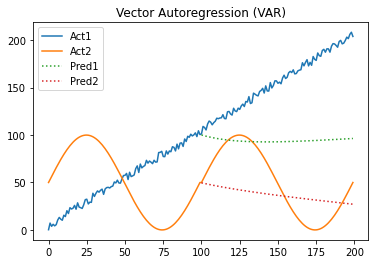

In [8]:
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

def VAR_model(train,test):
    # fit model
    model = VAR(train)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.forecast(model_fit.y, steps=len(test))
    res=pd.DataFrame({"Pred1":[x[0] for x in yhat], "Pred2":[x[1] for x in yhat], 
                      "Act1":test["Act1"].values, "Act2":test["Act2"].values})
    return res

df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
                         'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
                         'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret = VAR_model(df_train, df_test)
show_graph(df_train, df_ret, "Vector Autoregression (VAR)")

## 8. Vector Autoregression Moving-Average (VARMA)
The Vector Autoregression Moving-Average (VARMA) method models the next step in each time series using an ARMA model. It is the generalization of ARMA to multiple parallel time series, e.g. multivariate time series.<br>

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to a VARMA function, e.g. VARMA(p, q). A VARMA model can also be used to develop VAR or VMA models.<br>

The method is suitable for multivariate time series without trend and seasonal components.<br>

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


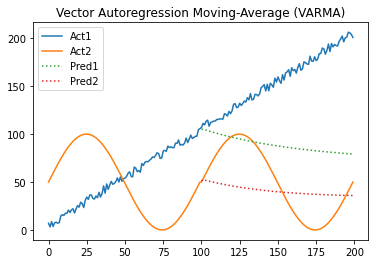

In [9]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

def VARMA_model(train,test):
    # fit model
    model = VARMAX(train, order=(1, 2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.forecast(steps=len(test))
    res=pd.DataFrame({"Pred1":yhat['Act1'], "Pred2":yhat['Act2'], 
                      "Act1":test["Act1"].values, "Act2":test["Act2"].values})
    return res

df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
                         'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
                         'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret = VARMA_model(df_train, df_test)
show_graph(df_train, df_ret, "Vector Autoregression Moving-Average (VARMA)")

## 9. Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
The Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) is an extension of the VARMA model that also includes the modeling of exogenous variables. It is a multivariate version of the ARMAX method.<br>

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).<br>

The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.<br>

The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.<br>

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


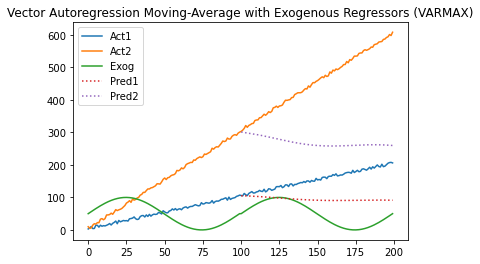

In [10]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

def VARMAX_model(train,test):
    # fit model
    model = VARMAX(train.drop('Exog', axis=1), exog=train['Exog'], order=(1, 1))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.forecast(steps=len(test),exog=test['Exog'])
    res=pd.DataFrame({"Pred1":yhat['Act1'], "Pred2":yhat['Act2'], 
            "Act1":test["Act1"].values, "Act2":test["Act2"].values, "Exog":test["Exog"].values})
    return res

df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
                         'Act2':[x*3 + random()*10 for x in range(0, 100)],
                         'Exog':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
                         'Act2':[x*3 + random()*10 for x in range(101, 201)],
                         'Exog':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret = VARMAX_model(df_train, df_test)
show_graph(df_train, df_ret,"Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)")

## 10. Simple Exponential Smoothing (SES)
The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.<br>

The method is suitable for univariate time series without trend and seasonal components.<br>

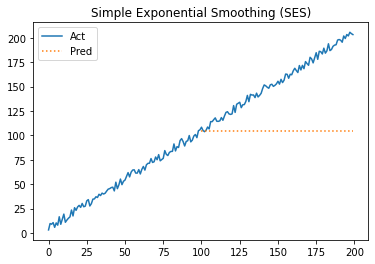

In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

def SES_model(train,test):
    # fit model
    model = SimpleExpSmoothing(train['Act'])
    model_fit = model.fit()
    # make prediction
    yhat=model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)],
                     columns=['Act'])
df_ret = SES_model(df_train, df_test)
show_graph(df_train, df_ret,"Simple Exponential Smoothing (SES)")

## 11. Holt Winter’s Exponential Smoothing (HWES)
The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.<br>

The method is suitable for univariate time series with trend and/or seasonal components.<br>

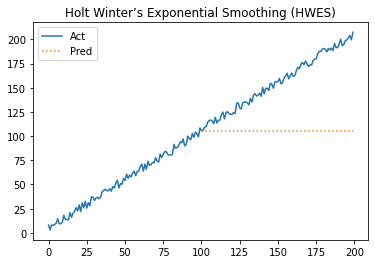

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random

def HWES_model(train,test):
    # fit model
    model = ExponentialSmoothing(train['Act'])
    model_fit = model.fit()
    # make prediction
    yhat=model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)],
                     columns=['Act'])
df_ret = HWES_model(df_train, df_test)
show_graph(df_train, df_ret, "Holt Winter’s Exponential Smoothing (HWES)")

## Reference
This section provides more resources on the topic if you are looking to go deeper.

Statsmodels: Time Series analysis API<br>
http://www.statsmodels.org/dev/tsa.html

Statsmodels: Time Series Analysis by State Space Methods<br>
http://www.statsmodels.org/dev/statespace.html

I write this notebook referencing this cheat sheet<br>
https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

Thank you.